In [7]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('SAMPLE_DATA/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(dataset.shape)
print(trainX.shape)
print(trainY.shape)

(144, 1)
(94, 1, 1)
(94,)


In [10]:
perm_train_ids=np.random.permutation(trainY.shape[0])

In [12]:
print(perm_train_ids.shape

(94,)

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX[perm_train_ids,:,:], trainY[perm_train_ids], epochs=100, batch_size=1, verbose=2)


# in_out_neurons = 2  
# hidden_neurons = 300
# model = Sequential()
# model.add(LSTM(hidden_neurons, return_sequences=False,
#                input_shape=(None, in_out_neurons)))
# model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
# model.add(Activation("linear"))  
# model.compile(loss="mean_squared_error", optimizer="rmsprop")  
# model.fit(X_train, y_train, batch_size=450, epochs=10, validation_split=0.05)  

Epoch 1/100
0s - loss: 0.0513
Epoch 2/100
0s - loss: 0.0256
Epoch 3/100
0s - loss: 0.0197
Epoch 4/100
0s - loss: 0.0183
Epoch 5/100
0s - loss: 0.0174
Epoch 6/100
0s - loss: 0.0164
Epoch 7/100
0s - loss: 0.0154
Epoch 8/100
0s - loss: 0.0144
Epoch 9/100
0s - loss: 0.0134
Epoch 10/100
0s - loss: 0.0125
Epoch 11/100
0s - loss: 0.0115
Epoch 12/100
0s - loss: 0.0106
Epoch 13/100
0s - loss: 0.0096
Epoch 14/100
0s - loss: 0.0087
Epoch 15/100
0s - loss: 0.0077
Epoch 16/100
0s - loss: 0.0068
Epoch 17/100
0s - loss: 0.0059
Epoch 18/100
0s - loss: 0.0052
Epoch 19/100
0s - loss: 0.0045
Epoch 20/100
0s - loss: 0.0040
Epoch 21/100
0s - loss: 0.0034
Epoch 22/100
0s - loss: 0.0030
Epoch 23/100
0s - loss: 0.0028
Epoch 24/100
0s - loss: 0.0025
Epoch 25/100
0s - loss: 0.0023
Epoch 26/100
0s - loss: 0.0022
Epoch 27/100
0s - loss: 0.0022
Epoch 28/100
0s - loss: 0.0021
Epoch 29/100
0s - loss: 0.0021
Epoch 30/100
0s - loss: 0.0020
Epoch 31/100
0s - loss: 0.0021
Epoch 32/100
0s - loss: 0.0021
Epoch 33/100
0s -

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 101.0
Trainable params: 101
Non-trainable params: 0.0
_________________________________________________________________


Train Score: 24.70 RMSE
Test Score: 53.59 RMSE


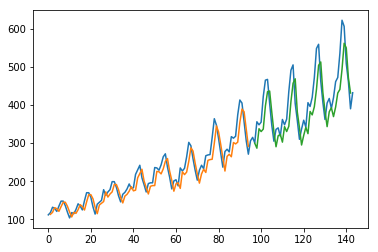

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()